# Crypto Arbitrage

Sort through historical trade data for Bitcoin on two exchanges to identify simultaneous price dislocation and consider arbitrage opportunities. Dataset includes trade data from January 2018 through March 2018.

In this notebook:

1. Collect the data.

2. Prepare the data.

3. Analyze the data.



### libraries and dependencies.

In [1]:
import pandas as pd
from pathlib import Path
%matplotlib inline

# Collect the Data

In [2]:
# Read "bitstamp.csv"
# Set the index to the column "Timestamp"
bitstamp_df = pd.read_csv(
    Path('./Resources/bitstamp.csv'),
    index_col='Timestamp',
    parse_dates=True,
    infer_datetime_format=True
)

bitstamp_df.head(2)

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13681.04,13681.04,13637.93,$13646.48,3.334553,45482.128785,13639.647479
2018-01-01 00:01:00,13646.48,13658.75,13610.18,$13658.75,2.663188,36361.390888,13653.332816


In [3]:
# Read "coinbase.csv"
# Set the index to the column "Timestamp"
coinbase_df = pd.read_csv(
    Path('./Resources/coinbase.csv'),
    index_col='Timestamp',
    parse_dates=True,
    infer_datetime_format=True
)

coinbase_df.head(2)

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13620.00,13620.00,13608.49,$13608.49,20.812754,283451.08537,13619.105106
2018-01-01 00:01:00,13607.14,13607.14,13601.66,$13601.66,13.474359,183283.97801,13602.426919


# Prepare the Data

In [4]:
# Clean bitstamp_df

# Drop NaN
bitstamp_df = bitstamp_df.loc[:,:].dropna()

# Remove dollar signs for Close column 
bitstamp_df.loc[:,'Close'] = bitstamp_df.loc[:,'Close'].str.replace('$', '')

# Convert type of Close colmn to float
bitstamp_df.loc[:,'Close'] = bitstamp_df.loc[:,'Close'].astype(float)

# Remove duplicates
bitstamp_df = bitstamp_df.loc[:,:].drop_duplicates()

In [5]:
bitstamp_df.isnull().sum()

Open              0
High              0
Low               0
Close             0
BTC Volume        0
USD Volume        0
Weighted Price    0
dtype: int64

In [6]:
# Clean coinbase_df

# Drop NaN
coinbase_df = coinbase_df.loc[:,:].dropna()

# Remove dollar signs for Close column 
coinbase_df.loc[:,'Close'] = coinbase_df.loc[:,'Close'].str.replace('$', '')

# Convert type of Close colmn to float
coinbase_df.loc[:,'Close'] = coinbase_df.loc[:,'Close'].astype(float)

# Remove duplicates
coinbase_df = coinbase_df.loc[:,:].drop_duplicates()

In [7]:
# Convert the Close data type to a float
coinbase_df.isnull().sum()

Open              0
High              0
Low               0
Close             0
BTC Volume        0
USD Volume        0
Weighted Price    0
dtype: int64

# Analyze the Data

## Bitstamp 

In [8]:
# create bitstamp_slice select 'Close'
bitstamp_slice = bitstamp_df.loc[:, ['Close']]

bitstamp_slice.head(5)

,Close
Timestamp,
2018-01-01 00:00:00,13646.48
2018-01-01 00:01:00,13658.75
2018-01-01 00:02:00,13610.22
2018-01-01 00:03:00,13639.09
2018-01-01 00:04:00,13620.00


In [9]:
bitstamp_slice.describe()

,Close
count,129067.000000
mean,10459.842453
std,2315.976088
min,5944.000000
25%,8613.370000
50%,10145.950000
75%,11444.810000
max,17234.980000


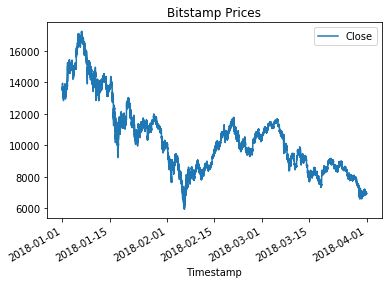

In [10]:
bitstamp_slice.plot(title='Bitstamp Prices')

## Coinbase

In [11]:
# create coinbase_slice select 'Close'
coinbase_slice = coinbase_df.loc[:, ['Close']]

coinbase_slice.head(5)

,Close
Timestamp,
2018-01-01 00:00:00,13608.49
2018-01-01 00:01:00,13601.66
2018-01-01 00:02:00,13580.00
2018-01-01 00:03:00,13550.34
2018-01-01 00:04:00,13583.44


In [12]:
coinbase_slice.describe()

,Close
count,129322.000000
mean,10449.140958
std,2317.197419
min,5882.310000
25%,8609.230000
50%,10137.440000
75%,11397.237500
max,17177.990000


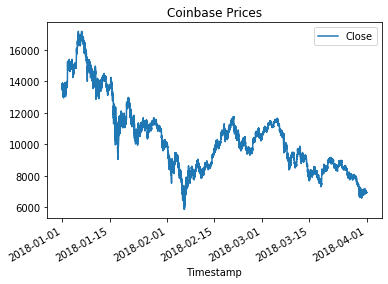

In [13]:
coinbase_slice.plot(title='Coinbase Prices')

## Bitstamp vs Coinbase Comparison

### Dataset Comparison Visualization

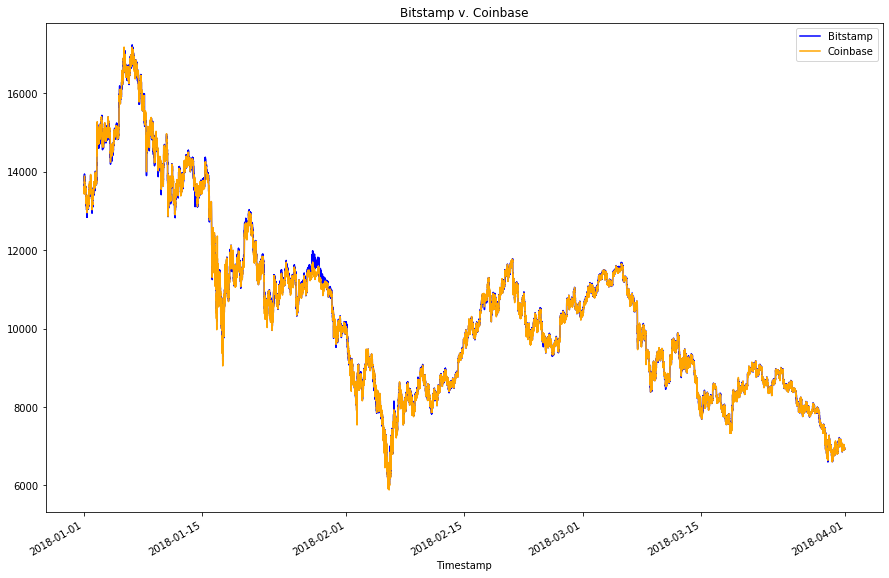

In [14]:
bitstamp_slice['Close'].plot(legend=True, figsize=(15, 10), title="Bitstamp v. Coinbase", color="blue", label="Bitstamp")

coinbase_slice['Close'].plot(legend=True, figsize=(15, 10), title="Bitstamp v. Coinbase", color="orange", label="Coinbase")

### January 2018 Visualization

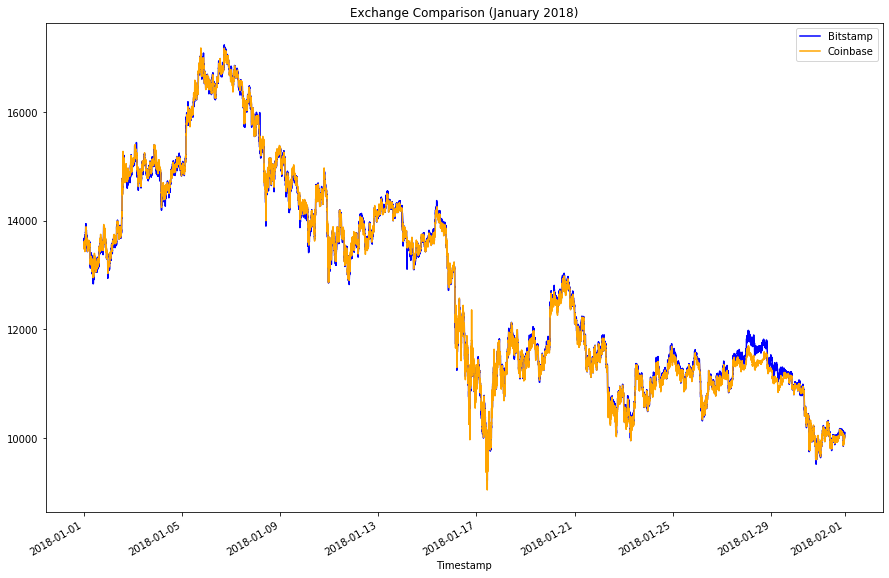

In [15]:
bitstamp_slice['Close'].loc['2018-01-01':'2018-01-31'].plot(legend=True, figsize=(15, 10), title="Exchange Comparison (January 2018)", color="blue", label="Bitstamp")

coinbase_slice['Close'].loc['2018-01-01':'2018-01-31'].plot(legend=True, figsize=(15, 10), color="orange", label="Coinbase")

### March 2018 Visualization

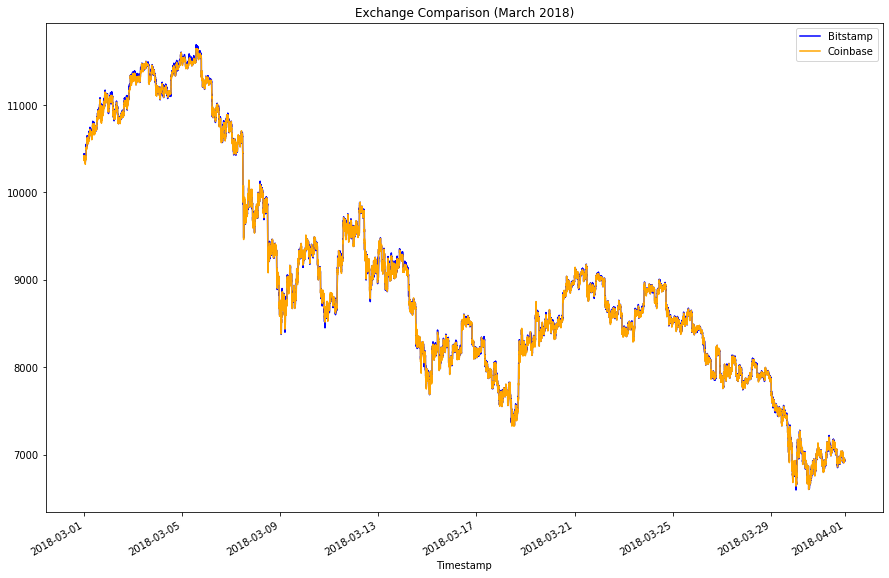

In [16]:
bitstamp_slice['Close'].loc['2018-03-01':'2018-03-31'].plot(legend=True, figsize=(15, 10), title="Exchange Comparison (March 2018)", color="blue", label="Bitstamp")

coinbase_slice['Close'].loc['2018-03-01':'2018-03-31'].plot(legend=True, figsize=(15, 10), color="orange", label="Coinbase")

### Early Period Visualization

In [17]:
early_date = '2018-01-16'
early_date_str = 'January 16th, 2018'

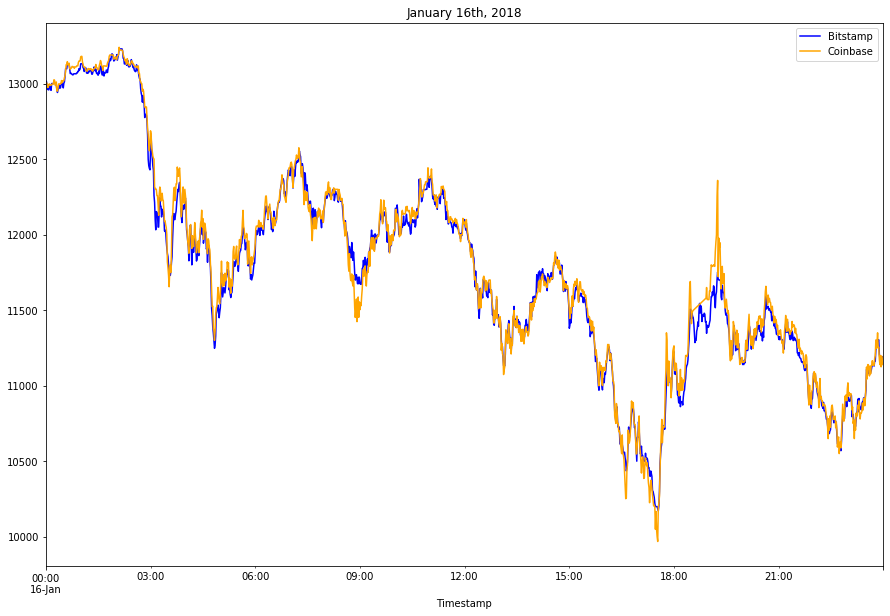

In [18]:
bitstamp_slice['Close'].loc[early_date].plot(legend=True, figsize=(15, 10), title=early_date_str, color="blue", label="Bitstamp")

coinbase_slice['Close'].loc[early_date].plot(legend=True, figsize=(15, 10), color="orange", label="Coinbase")

In [19]:
# Arbitrage spread for early period in Dataset
arbitrage_spread_early = coinbase_slice['Close'].loc[early_date] - bitstamp_slice['Close'].loc[early_date]
arbitrage_spread_early.describe()

count    1419.000000
mean       23.212135
std        67.789186
min      -275.920000
25%        -8.330000
50%        22.280000
75%        52.355000
max       606.800000
Name: Close, dtype: float64

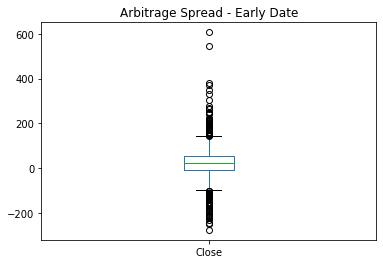

In [20]:
# Arbitrage spread for early period Box visualization
arbitrage_spread_early.plot(kind='box', title = "Arbitrage Spread - Early Date" )

### Early Period Profit

In [21]:
arbitrage_spread_early = coinbase_slice['Close'].loc[early_date] - bitstamp_slice['Close'].loc[early_date]

spread_return_early= arbitrage_spread_early[arbitrage_spread_early > 0 ] / bitstamp_slice['Close'].loc[early_date]

profitable_trades_early = spread_return_early[spread_return_early > .01]

profitable_trades_early.describe()

count    73.000000
mean      0.016720
std       0.007628
min       0.010109
25%       0.012061
50%       0.014794
75%       0.018124
max       0.051633
Name: Close, dtype: float64

In [22]:
profit_early = profitable_trades_early * bitstamp_slice['Close'].loc[early_date]
profit_per_trade_early = profit_early.dropna()
profit_per_trade_early

Timestamp
2018-01-16 02:56:00    162.01
2018-01-16 02:57:00    135.00
2018-01-16 02:59:00    176.13
2018-01-16 03:00:00    134.01
2018-01-16 03:06:00    241.54
                        ...  
2018-01-16 19:23:00    125.09
2018-01-16 19:26:00    131.78
2018-01-16 19:38:00    124.01
2018-01-16 19:48:00    117.63
2018-01-16 20:07:00    113.69
Name: Close, Length: 73, dtype: float64

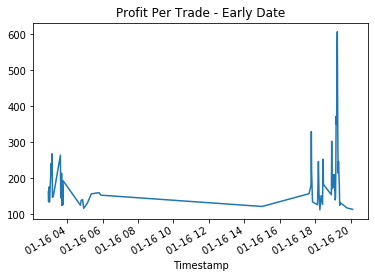

In [23]:
profit_per_trade_early.plot(title = "Profit Per Trade - Early Date")

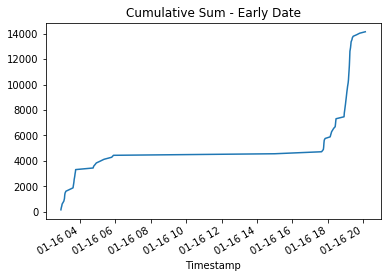

In [24]:
cumulative_profit_early = profit_per_trade_early.cumsum()
cumulative_profit_early.plot(title = "Cumulative Sum - Early Date")

### Middle Period Visualization

In [25]:
middle_date = '2018-02-24'
middle_date_str = 'February 24th, 2018'

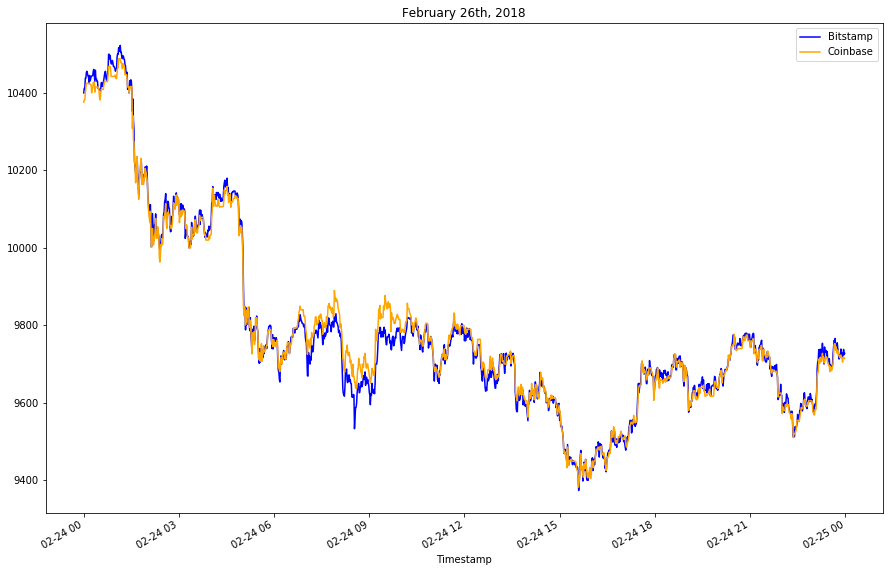

In [26]:
bitstamp_slice['Close'].loc[middle_date].plot(legend=True, figsize=(15, 10), title="February 26th, 2018", color="blue", label="Bitstamp")
coinbase_slice['Close'].loc[middle_date].plot(legend=True, figsize=(15, 10), color="orange", label="Coinbase")

In [27]:
# Arbitrage spread for middle period Box visualization
arbitrage_spread_middle = coinbase_slice['Close'].loc[middle_date] - bitstamp_slice['Close'].loc[middle_date]

# Generate summary statistics 
arbitrage_spread_middle.describe()

count    1437.000000
mean        3.396131
std        22.969472
min       -50.180000
25%       -10.590000
50%        -0.010000
75%        12.120000
max       121.320000
Name: Close, dtype: float64

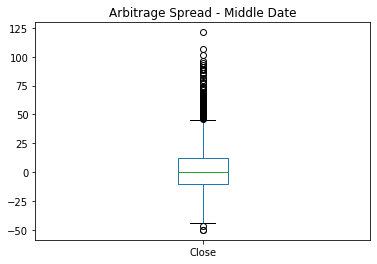

In [28]:
# Arbitrage spread for early period Box visualization
arbitrage_spread_middle.plot(kind='box', title = "Arbitrage Spread - Middle Date" )

### Middle Period Profit

In [29]:
arbitrage_spread_middle = coinbase_slice['Close'].loc[middle_date] - bitstamp_slice['Close'].loc[middle_date]

spread_return_middle = arbitrage_spread_middle[arbitrage_spread_middle > 0 ] / bitstamp_slice['Close'].loc[middle_date]

profitable_trades_middle = spread_return_middle[spread_return_middle > .01]

profitable_trades_middle.describe()

count    3.000000
mean     0.011377
std      0.001199
min      0.010431
25%      0.010703
50%      0.010974
75%      0.011850
max      0.012726
Name: Close, dtype: float64

In [30]:
profit_middle = profitable_trades_middle * bitstamp_slice['Close'].loc[middle_date]
profit_per_trade_middle = profit_middle.dropna()
profit_per_trade_middle

Timestamp
2018-02-24 08:32:00    121.32
2018-02-24 09:32:00    107.00
2018-02-24 09:39:00    101.75
Name: Close, dtype: float64

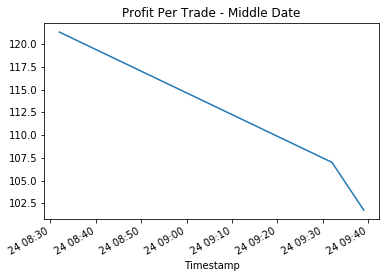

In [31]:
profit_per_trade_middle.plot(title = "Profit Per Trade - Middle Date")

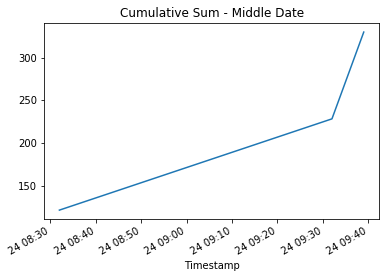

In [32]:
cumulative_profit_middle = profit_per_trade_middle.cumsum()
cumulative_profit_middle.plot(title = "Cumulative Sum - Middle Date")

### Late Period Visualization

In [33]:
late_date = '2018-3-20'
late_date_str = 'March 26th, 2018'

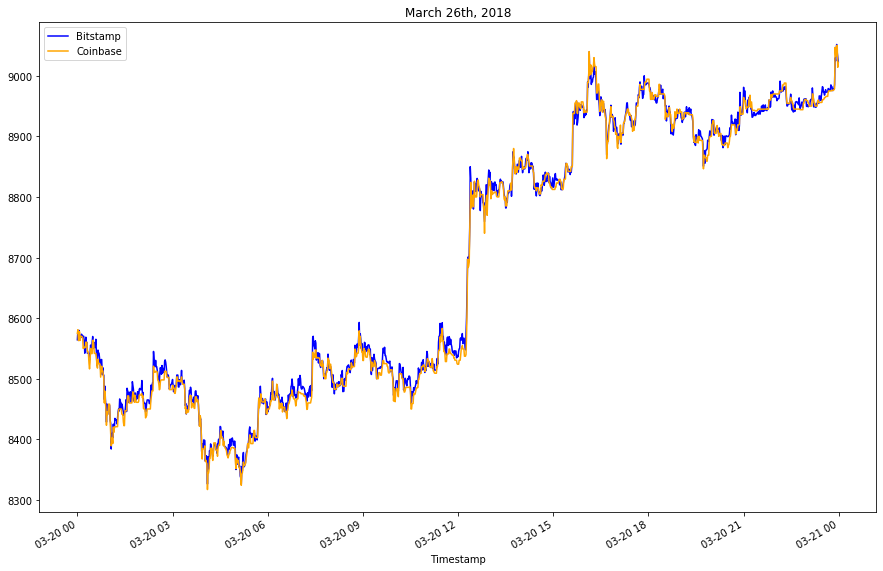

In [34]:
bitstamp_slice['Close'].loc[late_date].plot(legend=True, figsize=(15, 10), title=late_date_str, color="blue", label="Bitstamp")
coinbase_slice['Close'].loc[late_date].plot(legend=True, figsize=(15, 10), color="orange", label="Coinbase")

In [35]:
# Arbitrage spread for late period Box visualization
arbitrage_spread_late = coinbase_slice['Close'].loc[late_date] - bitstamp_slice['Close'].loc[late_date]

# Generate summary statistics 
arbitrage_spread_late.describe()

count    1432.000000
mean       -4.572556
std         9.269393
min       -59.950000
25%       -10.962500
50%        -4.825000
75%         1.477500
max        27.930000
Name: Close, dtype: float64

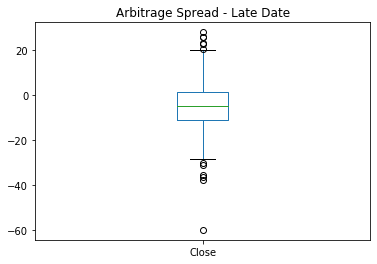

In [36]:
# Arbitrage spread for early period Box visualization
arbitrage_spread_late.plot(kind='box', title = "Arbitrage Spread - Late Date" )

### Late Period Profit

In [37]:
arbitrage_spread_late = coinbase_slice['Close'].loc[late_date] - bitstamp_slice['Close'].loc[late_date]

spread_return_late= arbitrage_spread_late[arbitrage_spread_late > 0 ] / bitstamp_slice['Close'].loc[late_date]

profitable_trades_late = spread_return_late[spread_return_late > .01]

profitable_trades_late.describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Close, dtype: float64

In [38]:
profit_late = profitable_trades_late * bitstamp_slice['Close'].loc[late_date]
profit_per_trade_late = profit_late.dropna()
profit_per_trade_late

Series([], Name: Close, dtype: float64)

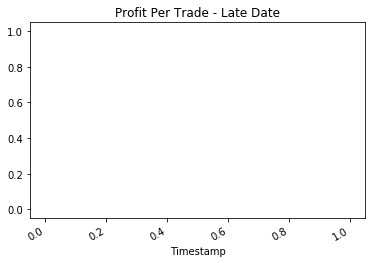

In [39]:
profit_per_trade_late.plot(title = "Profit Per Trade - Late Date")

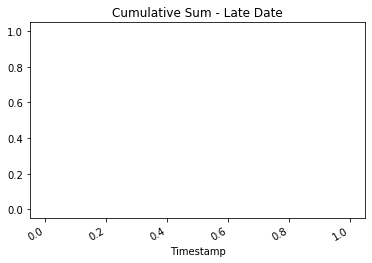

In [40]:
cumulative_profit_late = profit_per_trade_late.cumsum()
cumulative_profit_late.plot(title = "Cumulative Sum - Late Date")

# Conclusion

January and March comparison has the degree of spread between the Bitstamp and Coinbase price become narrower as time progresssed from January 2018 to March 2018.

As a result of this narrowing, arbitrage profits become limited as time progressed.